In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import os

path = "TrainingData"

files = os.listdir(path)

x_csv = []
x_time_csv = []
y_csv = []
y_time_csv = []

for file in files:
    if file.endswith("_x.csv"):
        x_csv.append(pd.read_csv(path+"/"+file,header = None))
    elif file.endswith("_x_time.csv"):
        x_time_csv.append(pd.read_csv(path+"/"+file,header = None))
    elif file.endswith("_y.csv"):
        y_csv.append(pd.read_csv(path+"/"+file,header = None))
    elif file.endswith("_y_time.csv"):
        y_time_csv.append(pd.read_csv(path+"/"+file,header = None))


In [3]:
for i in range(29):
    print(len(x_csv[i]),4*len(y_csv[i]))

37890 37892
70172 70172
43146 43148
54956 54956
59121 59120
38631 38632
31423 31424
66762 66764
55999 56000
55401 55400
48797 48796
51461 51460
42319 42320
36313 36312
47210 47212
19533 19532
34309 34308
34476 34476
56079 56080
34519 34520
44905 44904
48125 48124
59562 59564
45129 45128
46201 46200
46989 46988
44641 44640
39439 39440
48138 48140


In [4]:
l = []
for j in range(29):
    new_list = []
    for i in (y_csv[j].T).values.tolist()[0]:
        new_list.extend([i]*4)
    l.append(pd.DataFrame(new_list))


y_csv = l
l = []
for j in range(29):
    new_list = []
    for i in (y_time_csv[j].T).values.tolist()[0]:
        new_list.extend([i]*4)
    l.append(pd.DataFrame(new_list))
y_time_csv = l


In [5]:
for i in range(29):
    print(len(x_csv[i]),len(y_csv[i]))

37890 37892
70172 70172
43146 43148
54956 54956
59121 59120
38631 38632
31423 31424
66762 66764
55999 56000
55401 55400
48797 48796
51461 51460
42319 42320
36313 36312
47210 47212
19533 19532
34309 34308
34476 34476
56079 56080
34519 34520
44905 44904
48125 48124
59562 59564
45129 45128
46201 46200
46989 46988
44641 44640
39439 39440
48138 48140


In [6]:
for i in range(29):
    if len(x_csv[i])>len(y_csv[i]):
        x_csv[i] = x_csv[i].drop(x_csv[i].iloc[-(len(x_csv[i])-len(y_csv[i])):].index)
        x_time_csv[i] = x_time_csv[i].drop(x_time_csv[i].iloc[-(len(x_time_csv[i])-len(y_csv[i])):].index)
    elif len(x_csv[i])<len(y_csv[i]):
        y_csv[i] = y_csv[i].drop(y_csv[i].iloc[-(len(y_csv[i])-len(x_csv[i])):].index)
        y_time_csv[i] = y_time_csv[i].drop(y_time_csv[i].iloc[-(len(y_time_csv[i])-len(x_csv[i])):].index)
    


In [7]:
for i in range(29):
    print(len(x_csv[i]),len(y_csv[i]))

37890 37890
70172 70172
43146 43146
54956 54956
59120 59120
38631 38631
31423 31423
66762 66762
55999 55999
55400 55400
48796 48796
51460 51460
42319 42319
36312 36312
47210 47210
19532 19532
34308 34308
34476 34476
56079 56079
34519 34519
44904 44904
48124 48124
59562 59562
45128 45128
46200 46200
46988 46988
44640 44640
39439 39439
48138 48138


In [8]:
# x_csv = pd.concat(x_csv)
# x_time_csv = pd.concat(x_time_csv)
# y_csv = pd.concat(y_csv)
# y_time_csv = pd.concat(y_time_csv)
for df in x_csv:
    df.set_axis(["1","2","3","4","5","6"], axis=1, inplace=True)
x = pd.concat(x_csv).reset_index(drop=True)


In [11]:
# for df in x_time_csv:
#     df.set_axis(["7"], axis=1, inplace=True)
# x_time_csv
# x_time_csv = pd.concat(x_time_csv).reset_index(drop=True)
# x['7'] = x_time_csv

In [9]:
for df in y_csv:
    df.set_axis(["Y"], axis=1, inplace=True)
y = pd.concat(y_csv).reset_index(drop=True)

In [10]:
x,y

(                1         2         3         4         5         6
 0        4.435275  8.196063  2.974488  0.014215 -0.039157 -0.016744
 1        4.186920  8.344455  2.908057  0.005771 -0.004480 -0.003345
 2        4.544637  8.408659  2.890000  0.007967  0.022412  0.001159
 3        4.849308  8.411614  2.900692  0.027778 -0.010670 -0.014223
 4        4.509190  8.118649  2.847298  0.021577 -0.045498 -0.021111
 ...           ...       ...       ...       ...       ...       ...
 1341628  2.072244  8.908878 -3.500000  0.001351  0.001191  0.001031
 1341629  2.085123  8.915123 -3.520000  0.001918 -0.001147  0.000000
 1341630  2.083774  8.910000 -3.538981 -0.002015 -0.004099  0.001042
 1341631  2.111447  8.908553 -3.535724  0.000183 -0.001673  0.001856
 1341632  2.087730  8.900000 -3.518865  0.000052 -0.001267  0.000000
 
 [1341633 rows x 6 columns],
          Y
 0        0
 1        0
 2        0
 3        0
 4        0
 ...     ..
 1341628  0
 1341629  0
 1341630  0
 1341631  0
 1341632 

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [13]:
x

array([[ 6.63865175e-01,  2.36377136e-02, -5.55171281e-01,
         2.97532289e-03, -4.04391253e-02,  6.60469158e-02],
       [ 6.20544908e-01,  4.52871459e-02, -5.67085160e-01,
         3.50743557e-04, -1.82720185e-02,  8.34568144e-02],
       [ 6.82941059e-01,  5.46540939e-02, -5.70323541e-01,
         1.03347841e-03, -1.08201851e-03,  8.93083295e-02],
       ...,
       [ 2.53695656e-01,  1.27796501e-01, -1.72331088e+00,
        -2.06917290e-03, -1.80290443e-02,  8.91570716e-02],
       [ 2.58522624e-01,  1.27585393e-01, -1.72272676e+00,
        -1.38591095e-03, -1.64778319e-02,  9.02144711e-02],
       [ 2.54385696e-01,  1.26337565e-01, -1.71970323e+00,
        -1.42671538e-03, -1.62182484e-02,  8.78030474e-02]])

In [14]:
x = pd.DataFrame(x,columns = ["1","2","3","4","5","6"])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x['y'] = y

In [20]:
x.drop(['y'],inplace=True,axis=1)

In [18]:
y.value_counts()

Y
0    1006913
3     206436
2      73068
1      55216
dtype: int64

In [22]:
!pip install imblearn

  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [28]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(x, y)


In [29]:
y_resampled.value_counts()


Y
0    1006913
1    1006913
2    1006913
3    1006913
dtype: int64

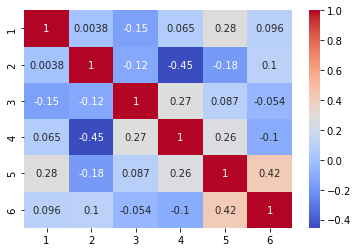

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample correlation matrix
corr_matrix = x.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [38]:
X_resampled['y'] = y_resampled

In [40]:
X_resampled

,1,2,3,4,5,6,y
0,0.663865,0.023638,-0.555171,0.002975,-0.040439,0.066047,0
1,0.620545,0.045287,-0.567085,0.000351,-0.018272,0.083457,0
2,0.682941,0.054654,-0.570324,0.001033,-0.001082,0.089308,0
3,0.736084,0.055085,-0.568406,0.007191,-0.022229,0.069323,0
4,0.676758,0.012344,-0.577982,0.005263,-0.044493,0.060373,0
...,...,...,...,...,...,...,...
4027647,0.725862,0.374254,-0.600192,-0.970825,0.141854,0.548421,3
4027648,-0.366764,4.206930,-0.799234,-1.002175,0.646043,-1.168881,3
4027649,-1.233645,0.765207,-1.052268,-0.143772,-0.474352,-0.519159,3
4027650,-0.389329,0.560887,-0.235594,-0.445080,-0.577364,-0.239120,3


In [42]:
X_train, X_test, y_train, y_test= train_test_split(X_resampled.drop('y',axis=1), X_resampled['y'], test_size=0.3, random_state=42, stratify=X_resampled['y'])

In [43]:
X_train

,1,2,3,4,5,6
2509004,0.003424,0.438805,-1.416725,-0.444362,-0.410592,0.313166
2106602,0.350410,-1.665025,1.405894,2.137569,0.481224,-0.340770
3801762,0.351121,0.238184,-0.514276,-0.699083,-0.052591,-0.316754
373342,0.062784,-1.277433,1.056647,2.239758,-1.837038,-2.552293
816709,-0.620700,-0.004127,0.575761,-0.273801,-0.975444,-1.477855
...,...,...,...,...,...,...
2366809,0.121908,2.283967,0.554922,-0.064416,-0.782190,0.184259
661901,-0.094425,-0.563437,0.423437,0.365966,0.129402,0.427508
2136578,4.071328,-3.132933,-2.612486,0.087406,1.346776,-0.235473
967934,1.074874,0.128632,0.179459,-0.116491,1.730818,0.951906


In [44]:
y_train

2509004    2
2106602    1
3801762    3
373342     3
816709     0
          ..
2366809    2
661901     0
2136578    1
967934     0
460642     0
Name: y, Length: 2819356, dtype: int64

In [45]:
X_test

,1,2,3,4,5,6
2036691,-1.725153,-0.536836,0.810468,1.779474,-0.942336,0.605709
2191352,-1.169506,-0.722273,1.242862,-0.362699,-0.478405,-0.599843
3560529,1.473884,-0.702848,-0.449850,1.715081,1.496186,3.703533
1386648,-0.727414,-0.929362,1.287943,-0.676447,-1.223532,-1.389956
3416172,-0.761349,0.136615,-0.253007,0.047592,-0.244608,0.214151
...,...,...,...,...,...,...
533652,-0.406050,-0.028434,0.596689,2.059874,-1.007114,0.598762
1446457,1.211145,-0.461496,0.647545,1.901081,1.311220,0.474568
3316934,0.224299,-0.074522,-0.696088,-0.113932,0.237106,0.488594
3028951,-0.562020,-2.060541,0.572023,0.828084,-0.292700,0.079073


In [46]:
y_test

2036691    1
2191352    1
3560529    3
1386648    1
3416172    3
          ..
533652     0
1446457    1
3316934    3
3028951    2
3678866    3
Name: y, Length: 1208296, dtype: int64

In [47]:
X_train.shape

(2819356, 6)

In [48]:
import tensorflow.keras as keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


In [ ]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D

# # Define the input shape
# input_shape = (7, 1)

# # Define the number of classes
# num_classes = 4

# # Create the model
# model = Sequential()

# # Add a convolutional layer with 32 filters, a kernel size of 3, and a relu activation
# model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))

# # Add a max pooling layer with a pool size of 2
# model.add(MaxPooling1D(pool_size=2))

# # Add a dropout layer to prevent overfitting
# model.add(Dropout(0.25))

# # Add a flatten layer to convert the output to a 1D vector
# model.add(Flatten())

# # Add a dense layer with 128 neurons and a relu activation
# model.add(Dense(128, activation='relu'))

# # Add a dropout layer to prevent overfitting
# model.add(Dropout(0.5))

# # Add the output layer with num_classes neurons and a softmax activation
# model.add(Dense(num_classes, activation='softmax'))

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model on the training data
# model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))


In [32]:
X_train.shape

(939143, 7)

In [51]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=64, return_sequences=True, input_shape=(6,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=16))
model.add(Dropout(0.2))

# Add dense layers
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
88105/88105 [==============================] - 1483s 17ms/step - loss: 0.9975 - accuracy: 0.5471 - val_loss: 0.7943 - val_accuracy: 0.6593
Epoch 2/10
88105/88105 [==============================] - 1227s 14ms/step - loss: 0.8250 - accuracy: 0.6454 - val_loss: 0.7626 - val_accuracy: 0.6769
Epoch 3/10
88105/88105 [==============================] - 1279s 15ms/step - loss: 0.8028 - accuracy: 0.6589 - val_loss: 0.7537 - val_accuracy: 0.6828
Epoch 4/10
88105/88105 [==============================] - 1288s 15ms/step - loss: 0.7897 - accuracy: 0.6655 - val_loss: 0.7406 - val_accuracy: 0.6887
Epoch 5/10
88105/88105 [==============================] - 1049s 12ms/step - loss: 0.7802 - accuracy: 0.6702 - val_loss: 0.7375 - val_accuracy: 0.6895
Epoch 6/10
88105/88105 [==============================] - 863s 10ms/step - loss: 0.7739 - accuracy: 0.6735 - val_loss: 0.7306 - val_accuracy: 0.6935
Epoch 7/10
88105/88105 [==============================] - 862s 10ms/step - loss: 0.7690 - accuracy: 0

In [52]:
model.save("ModelsC3/lstm2.h5")

In [53]:
from sklearn import metrics
from sklearn.metrics import classification_report
y_val=y_test

y_pred = np.argmax(model.predict(X_test), axis=1)

In [56]:
y_val = np.argmax(y_val, axis=1)

In [57]:
print('F1 Score:', metrics.f1_score(y_val, y_pred, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred))
print('Precision score: ', metrics.precision_score(y_val, y_pred, average='macro'))
print('Recall score: ', metrics.recall_score(y_val, y_pred, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred))
print('Confusion Matrix:', metrics.confusion_matrix(y_val, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))

F1 Score: 0.6932180245959935
Accuracy Score: 0.6980764647073233
Precision score:  0.6933450839590758
Recall score:  0.6980764647073234
Accuracy Score: 0.6980764647073233
Confusion Matrix: [[181993  36554  18348  65179]
 [ 20989 246556  17714  16815]
 [ 10531  21774 261125   8644]
 [ 92669  40057  15539 153809]]
Mean Absolute Error: 0.6341658004330065
